In [2]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
years = list(range(2010,2021))
data_folder = "england and wales data"
deaths_table = np.zeros((len(years),52))

In [4]:
for i in range(len(years)):
    yr = years[i]
    # format of the data changed from 2016
    # and then again in 2020 (for covid cases)
    # these values extract the right data
    after_16 = yr >= 2016
    sheet = 4 if yr == 2020 else 3
    row = 7 if yr == 2020 else 6

    # Find the data for the year (different years, different formats)
    filename = glob(f"{data_folder}/publishedweek*{yr}*.xls*")[0]
    year_data = pd.read_excel(filename, sheet_name=sheet)

    # add the weekly death data for the year (excluding week 53 if included that year)
    deaths_table[i] = year_data.iloc[row,1 + int(after_16):53 + int(after_16)]

In [5]:
# mean deaths in a week (excluding 2020)
mean = np.mean(deaths_table[:-1])

# Plot the data

In [6]:
def plot_data(table):
    fig,ax = plt.subplots(figsize=(16,10))
    for i in range(len(years)):
        color = "red" if years[i] == 2020 else None
        plt.plot(range(1,53), table[i], label=years[i], color=color)
    plt.xticks(range(1,53))

Plot the raw amount of deaths per week for each year

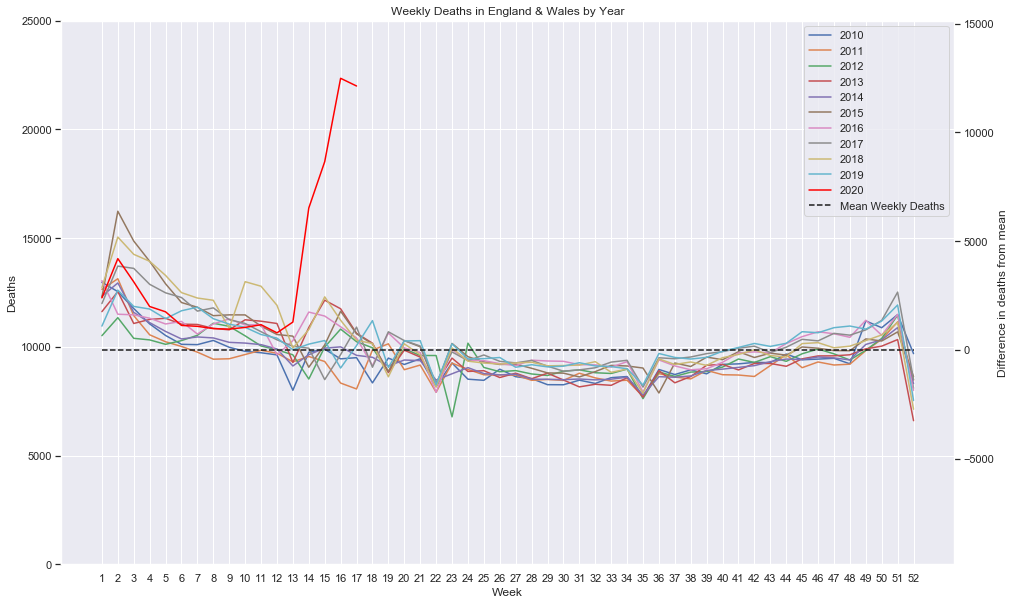

In [41]:
y_max = 25000

plot_data(deaths_table)
plt.plot([1,52],[mean,mean], "k--", label="Mean Weekly Deaths")
plt.legend()
plt.ylim(0,y_max)
plt.title("Deaths per week in England & Wales by Year")
plt.xlabel("Week")
plt.ylabel("Deaths")

# Add the 2nd y-axis showing difference from mean
plt.twinx()
plt.ylim(-mean,y_max-mean)
plt.grid(False)
plt.ylabel("Difference in deaths from mean")

plt.savefig("Deaths.png")
plt.show()

Deaths above or below mean for that week

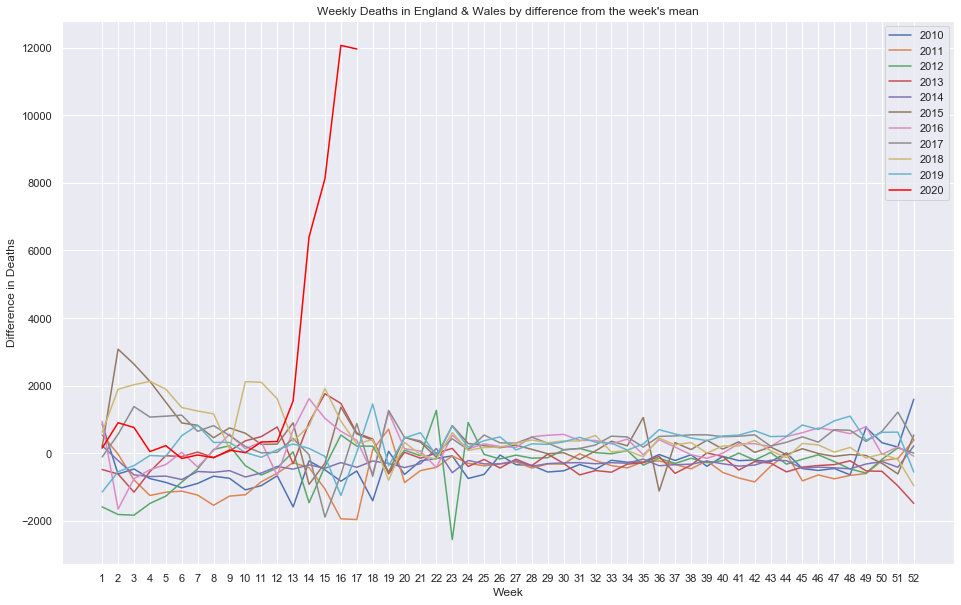

In [7]:
# means for each week (excluding 2020)
week_means = np.mean(deaths_table[:-1], 0)

week_centered_deaths = deaths_table - week_means
plot_data(week_centered_deaths)

plt.legend()
plt.title("Weekly Deaths in England & Wales by difference from the week's mean")
plt.xlabel("Week")
plt.ylabel("Difference in Deaths")

plt.show()

Cumulative sum graph of deaths above mean for the week

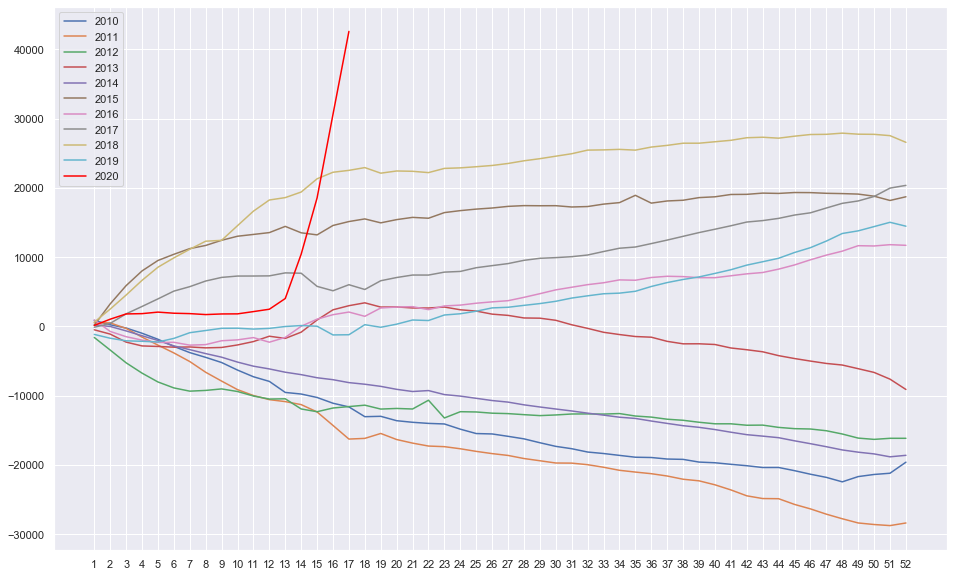

In [19]:
cum_deaths_above_mean = np.cumsum(week_centered_deaths, 1)
plot_data(cum_deaths_above_mean)
plt.legend()


In [13]:
test = np.ones((3,7))
np.cumsum(test,1)

array([[1., 2., 3., 4., 5., 6., 7.],
       [1., 2., 3., 4., 5., 6., 7.],
       [1., 2., 3., 4., 5., 6., 7.]])